# 1. Import Libraries and Datasets

## 1.1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from datetime import datetime, timedelta, date
from matplotlib import pyplot as plt
from scipy import stats

## 1.2. Import Datasets

In [2]:
cab_df = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
city_df = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [6]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
transaction_df = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


# 2. Dataset Preprocessing and Analysis

## 2.1 Data Type Processing

### Cab Dataset

In [10]:
min_date = cab_df['Date of Travel'].min()
min_period = datetime.fromordinal(min_date).date()
min_period

datetime.date(117, 1, 3)

Assuming the minimum "Date of Travel" is the first date in the period of 31/01/2016 to 31/12/2018, then the minimum date is 117 years, 1 month, 3 days before 31/01/2016. Hence, we need a base date to convert the column "Date of Travel" to the period within 31/01/2016 to 31/12/2018 which is 29/12/1899.

Concept from: [Stackoverflow](https://stackoverflow.com/questions/37743940/how-to-convert-julian-date-to-standard-date), [Fromordinal() Function Of Datetime.date Class In Python](https://www.geeksforgeeks.org/fromordinal-function-of-datetime-date-class-in-python/), and [Python | datetime.timedelta() function](https://www.geeksforgeeks.org/python-datetime-timedelta-function/)

In [11]:
base_date = pd.Timestamp('1899-12-29')
date_list = cab_df['Date of Travel'].to_list()
date_updated = [base_date + timedelta(date) for date in date_list]
cab_df['Date of Travel'] = pd.to_datetime(date_updated, format='%y-%m-%d')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### City Dataset

In [12]:
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype('float64')

In [13]:
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype('float64')

In [14]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


## 2.2 Dataset Analysis

### Cab Dataset

In [15]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [16]:
cab_df.describe(include = 'all', datetime_is_numeric = True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,2017-08-16 01:37:55.042293760,NaN,NaN,22.567254,423.443311,286.190113
min,1.000001e+07,2016-01-01 00:00:00,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,2016-11-22 00:00:00,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,2017-09-09 00:00:00,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,2018-05-11 00:00:00,NaN,NaN,32.960000,583.660000,413.683200
max,1.044011e+07,2018-12-30 00:00:00,NaN,NaN,48.000000,2048.030000,691.200000


In [17]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [18]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [19]:
# Check whether NA exists
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [20]:
# Check whether duplicated rows exists
cab_df.duplicated(subset = ['Transaction ID']).any()

False

### City Dataset

In [21]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [22]:
city_df.describe(include = 'all')

,City,Population,Users
count,20,2.000000e+01,20.000000
unique,20,NaN,NaN
top,NEW YORK NY,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1.231592e+06,64520.650000
std,NaN,1.740127e+06,83499.375289
min,NaN,2.489680e+05,3643.000000
25%,NaN,6.086372e+05,11633.250000
50%,NaN,7.845590e+05,23429.000000
75%,NaN,1.067041e+06,91766.000000


In [23]:
city_df['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [24]:
# Check whether NA exists
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [25]:
# Check whether duplicated rows exists
city_df.duplicated().any()

False

### Customer Dataset

In [26]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
customer_df.describe(include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


In [28]:
customer_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
# Check whether NA exists
customer_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [30]:
# Check whether duplicated rows exists
customer_df.duplicated(subset = ['Customer ID']).any()

False

### Transaction Dataset

In [31]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [32]:
transaction_df.describe(include = 'all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


In [33]:
transaction_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [34]:
# Check whether NA exists
transaction_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [35]:
# Check whether duplicated rows exists
transaction_df.duplicated(subset = ['Transaction ID', 'Customer ID']).any()

False

## 2.3 Dataset Merging

Each dataset has some common columns:

Dataset | Common Columns
------------- | -------------
Cab_Data  | City, Transaction ID
City  | City
Customer_ID | Customer ID
Transaction_ID  | Transaction ID, Customer ID

Hence, we merge the datasets into one main dataset using these common columns.

In [36]:
df = cab_df.merge(transaction_df, on = 'Transaction ID').merge(customer_df, on = 'Customer ID').merge(city_df, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


## 2.4 Merged Dataset Cleaning

### Basic Understanding of Merged Dataset

In [37]:
# Drop meaningless columns
df = df.drop(columns = ['Transaction ID', 'Customer ID'])
df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885.0,24701.0
1,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885.0,24701.0
2,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885.0,24701.0
3,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885.0,24701.0
4,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885.0,24701.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date of Travel      359392 non-null  datetime64[ns]
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Payment_Mode        359392 non-null  object        
 7   Gender              359392 non-null  object        
 8   Age                 359392 non-null  int64         
 9   Income (USD/Month)  359392 non-null  int64         
 10  Population          359392 non-null  float64       
 11  Users               359392 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 35.6+ MB


In [39]:
df.describe(include = 'all', datetime_is_numeric = True)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,3.593920e+05,359392.000000
unique,NaN,2,19,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,Card,Male,NaN,NaN,NaN,NaN
freq,NaN,274681,99885,NaN,NaN,NaN,215504,205912,NaN,NaN,NaN,NaN
mean,2017-08-16 01:37:55.042293504,NaN,NaN,22.567254,423.443311,286.190113,NaN,NaN,35.336705,15048.822937,3.132198e+06,158365.582267
min,2016-01-01 00:00:00,NaN,NaN,1.900000,15.600000,19.000000,NaN,NaN,18.000000,2000.000000,2.489680e+05,3643.000000
25%,2016-11-22 00:00:00,NaN,NaN,12.000000,206.437500,151.200000,NaN,NaN,25.000000,8424.000000,6.712380e+05,80021.000000
50%,2017-09-09 00:00:00,NaN,NaN,22.440000,386.360000,282.480000,NaN,NaN,33.000000,14685.000000,1.595037e+06,144132.000000
75%,2018-05-11 00:00:00,NaN,NaN,32.960000,583.660000,413.683200,NaN,NaN,42.000000,21035.000000,8.405837e+06,302149.000000
max,2018-12-30 00:00:00,NaN,NaN,48.000000,2048.030000,691.200000,NaN,NaN,65.000000,35000.000000,8.405837e+06,302149.000000


In [40]:
# Check whether NA exists
df.isna().sum()

Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [41]:
# Check whether null value exists
df.isnull().sum()

Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [42]:
# Check whether duplicated rows exists
df.duplicated().any()

False

### Outliers Treament

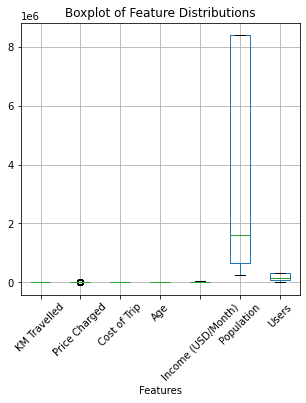

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
df.boxplot(ax = ax, rot = 45)

plt.xlabel('Features')
plt.title('Boxplot of Feature Distributions')
plt.show()

There is no outliers, so outlier treament is not needed.

# 3. Hypotheses

## 3.1 Final Dataset Correlation

In [44]:
correlation = df.corr()
correlation

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
KM Travelled,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,0.835753,1.000000,0.859812,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.015108,0.023628
Age,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.000544,0.003228,-0.000633,0.003907,1.000000,0.011868,0.010464
Population,-0.002311,0.326589,0.015108,-0.009002,0.011868,1.000000,0.915490
Users,-0.000428,0.281061,0.023628,-0.005906,0.010464,0.915490,1.000000


Text(0.5, 1.0, 'G2M Insight for Cab Investment Correlation Heatmap')

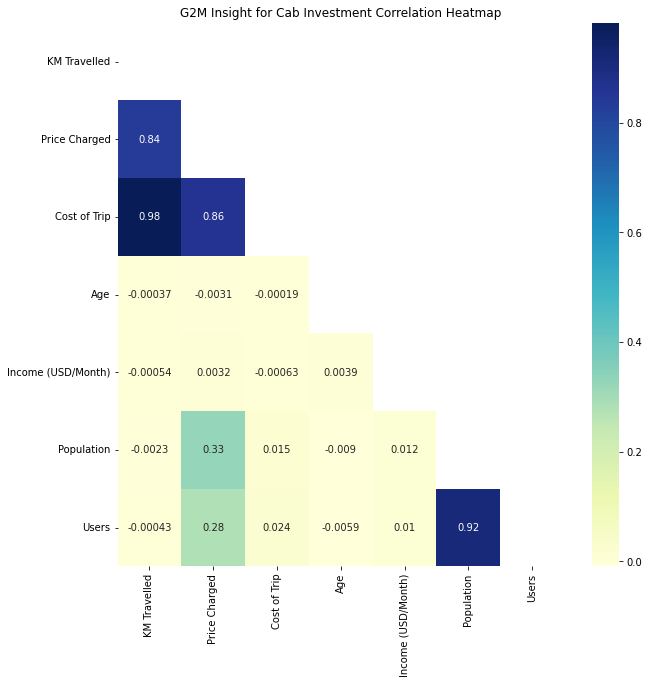

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, mask = np.triu(correlation), cmap = 'YlGnBu', annot = True)

plt.title('G2M Insight for Cab Investment Correlation Heatmap')

Observations:
1. Population and Users are highly correlated
2. Price Charged, Cost of Trip and KM Travelled are highly correlated

Hypotheses are required to facilitate further analysis for features that are not included in the correlation above.

## 3.2 Hypotheses

### 1. Is there any relationship between preference on Company and Gender?

Since both of the features are categorical variables, Chi-squared test of independence is used.

H0: There is no relationship between preference on Company and Gender.

H1: Threre is a relationship between preference on Company and Gender.

In [46]:
# Create contigency table
data_crosstab = pd.crosstab(df['Gender'], df['Company'], margins=True, margins_name="Total")
data_crosstab

Company,Pink Cab,Yellow Cab,Total
Gender,,,
Female,37480,116000,153480
Male,47231,158681,205912
Total,84711,274681,359392


In [47]:
# Significance level
alpha = 0.05

In [48]:
# Calcualtion of Chisquare
chi_square = 0
rows = df['Gender'].unique()
columns = df['Company'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [49]:
# Calculate p-value
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

In [50]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 107.3029246342706  and p value is: 0.0
Null Hypothesis is rejected.


Conclusion:

There is a relationship between preference on Company and Gender.

### 2. Is there any relationship between preference on Company and Cities?

Since both of the features are categorical variables, Chi-squared test of independence is used.

H0: There is no relationship between preference on Company and Cities.

H1: Threre is a relationship between preference on Company and Cities.

In [51]:
# Create contigency table
data_crosstab = pd.crosstab(df['City'], df['Company'], margins=True, margins_name="Total")
data_crosstab

Company,Pink Cab,Yellow Cab,Total
City,,,
ATLANTA GA,1762,5795,7557
AUSTIN TX,1868,3028,4896
BOSTON MA,5186,24506,29692
CHICAGO IL,9361,47264,56625
DALLAS TX,1380,5637,7017
DENVER CO,1394,2431,3825
LOS ANGELES CA,19865,28168,48033
MIAMI FL,2002,4452,6454
NASHVILLE TN,1841,1169,3010


In [52]:
# Significance level
alpha = 0.05

In [53]:
# Calcualtion of Chisquare
chi_square = 0
rows = df['City'].unique()
columns = df['Company'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [54]:
# Calculate p-value
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

In [55]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 39825.16829453775  and p value is: 0.0
Null Hypothesis is rejected.


Conclusion:

There is a relationship between preference on Company and Cities.

### 3. Is there any difference between preference on Company and Profit?

Since preference on Company is categorical variable and Profit is quantitative variable, so independent t-test is used.

H0: There is no difference between preference on Company and Profit.

H1: There is a difference between preference on Company and Profit.

In [56]:
pink = df.loc[df['Company'] == 'Pink Cab', 'Income (USD/Month)'].to_numpy()
yellow = df.loc[df['Company'] == 'Yellow Cab', 'Income (USD/Month)'].to_numpy()

In [57]:
# Significance level
alpha = 0.05

In [58]:
# Calculate p-value
st, p_value = stats.ttest_ind(a = pink, b = yellow, equal_var = True)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

In [59]:
print("t-test-score is:", st, " and p value is:", p_value)
print(conclusion)

t-test-score is: 0.42711269788899975  and p value is: 0.6692975005750657
Failed to reject the null hypothesis.


Conclusion:

There is no difference between preference on Company and Profit.

## 3.3 All Observations

1. Population and Users are highly correlated
2. Price Charged, Cost of Trip and KM Travelled are highly correlated
3. There is a relationship between preference on Company and Gender.
4. There is a relationship between preference on Company and Cities.
5. There is no difference between preference on Company and Profit.

# 4. Analysis

Based on the observations above:

1. Population and Users are highly correlated
2. Price Charged, Cost of Trip and KM Travelled are highly correlated
3. There is a relationship between preference on Company and Gender.
4. There is a relationship between preference on Company and Cities.
5. There is no difference between preference on Company and Profit.

We draw some facts here to help further analysis:

1. The preference on Company reflects directly on the profit.
2. Formulas:
    
    Profit = Price Charged - Cost of Trip

Areas to investigate:
1. Company Profit
2. Customer Background (age range, gender, residential cities, etc)
3. Factors of Company Profit

In [60]:
df.columns

Index(['Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Population', 'Users'],
      dtype='object')

## 4.1 Company Profit

### Profit (Total Price Charged - Total Cost of Trip)

In [61]:
# Make a copy of data
df_copy = df.__deepcopy__()
df_copy['Profit'] = df_copy['Price Charged'] - df_copy['Cost of Trip']
df_copy['Profit/ KM'] = df_copy['Profit'] / df_copy['KM Travelled']

In [62]:
# Check added column
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date of Travel      359392 non-null  datetime64[ns]
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Payment_Mode        359392 non-null  object        
 7   Gender              359392 non-null  object        
 8   Age                 359392 non-null  int64         
 9   Income (USD/Month)  359392 non-null  int64         
 10  Population          359392 non-null  float64       
 11  Users               359392 non-null  float64       
 12  Profit              359392 non-null  float64       
 13  Profit/ KM          359392 no

### Profit per year

In [63]:
def round_up_percentage(x):
  return np.round(100 * x / float(x.sum()), 2)

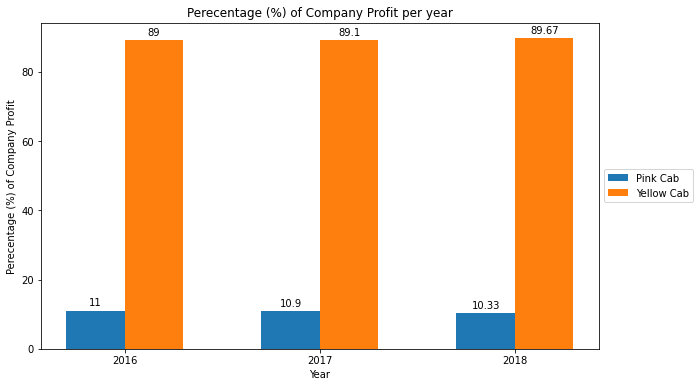

In [64]:
profit_by_year_and_comp = df_copy.groupby(['Company', df_copy['Date of Travel'].dt.year])['Profit'].sum()
profit_percentage = profit_by_year_and_comp.groupby(level = 1).apply(lambda x: round_up_percentage(x))

x = np.arange(len(df_copy['Date of Travel'].dt.year.unique()))  # number of years
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, profit_percentage.loc['Pink Cab'], width, label='Pink Cab')
rects2 = ax.bar(x + width/2, profit_percentage.loc['Yellow Cab'], width, label='Yellow Cab')

ax.set_ylabel('Perecentage (%) of Company Profit')
ax.set_xlabel('Year')
ax.set_title('Perecentage (%) of Company Profit per year')
ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_xticks(x, pd.DataFrame(profit_percentage).reset_index('Date of Travel')['Date of Travel'].unique())
ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)
plt.show()

Observations:

1. Since there is no difference between preference on Company and Profit, users prefer Yellow Cab over Pink Cab, hence, Yellow Cab earns more.
2. More users choose Yellow Cab over the years from 2016 to 2018.

### Profit based on Cities

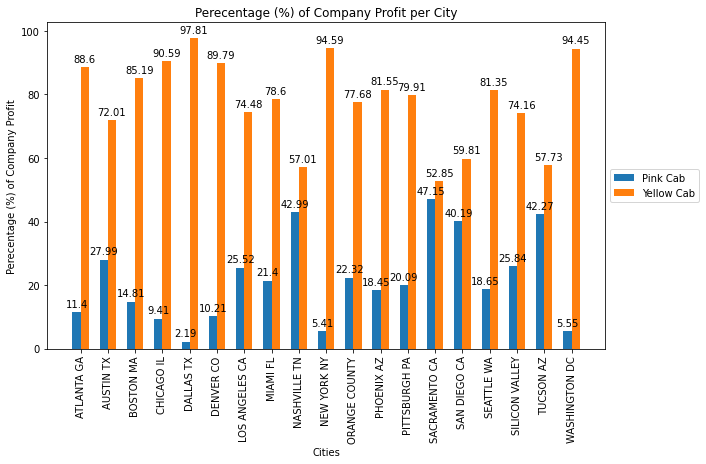

In [65]:
profit_by_cities_and_comp = df_copy.groupby(['Company', 'City'])['Profit'].sum()
profit_percentage = profit_by_cities_and_comp.groupby(level = 1).apply(lambda x: round_up_percentage(x))

x = np.arange(len(df_copy['City'].unique()))  # number of cities
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, profit_percentage.loc['Pink Cab'], width, label='Pink Cab')
rects2 = ax.bar(x + width/2, profit_percentage.loc['Yellow Cab'], width, label='Yellow Cab')

ax.set_ylabel('Perecentage (%) of Company Profit')
ax.set_xlabel('Cities')
ax.set_title('Perecentage (%) of Company Profit per City')
ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_xticks(x, pd.DataFrame(profit_percentage).reset_index('City')['City'].unique(), rotation = 90)
ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)
plt.show()

Observations:

1. Yellow Cab has the 3 highest profit in: DALLAS, NEW YORK, and WASHINGTON
2. Pink Cab has high profit in 4 cities: SACRAMENTO, NASHVILLE, TUCSON, SAN DIEGO

### Average Profit per KM

In [78]:
average_profit_per_km = np.round(df_copy.groupby('Company')['Profit/ KM'].mean(), 2)
average_profit_per_km

Company
Pink Cab      2.77
Yellow Cab    7.11
Name: Profit/ KM, dtype: float64

Does charging more reduce the customer preference on the company?

### Average Profit per Day

In [79]:
profit_per_day = df_copy.groupby('Company')['Profit'].sum()
duration = date(2018, 12, 31) - date(2016, 1, 31)

average_profit_per_day = np.round(profit_per_day / duration.days, 2)
average_profit_per_day

Company
Pink Cab       4983.41
Yellow Cab    41333.68
Name: Profit, dtype: float64

## 4.2 Factors of Company Profit

### User Age Group and Gender

#### Users' Age Group

In [68]:
# Seperate Users Age Range
# 0 - 30 years old : Young
# 30 - 60 years old: Middle-aged
# 60 above: Old
df_copy["Age Group"] = pd.cut(x=df_copy['Age'], bins=[0,30,60,100], labels=["Young","Middle-aged","Old"])

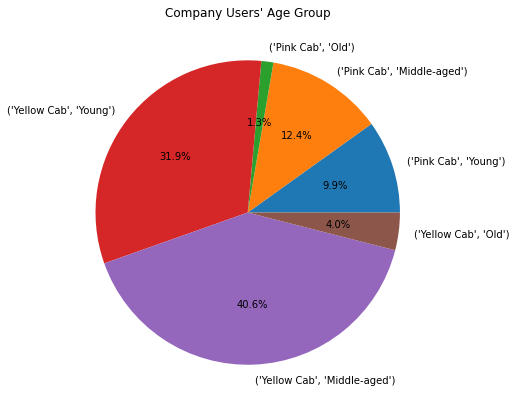

In [80]:
cab_comp_age = df_copy.groupby(['Company','Age Group'])['Users'].count()

# Plot
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(cab_comp_age.values, labels = cab_comp_age.index, autopct='%1.1f%%')
fig.set_facecolor('white')
plt.title('Company Users\' Age Group')
plt.show()

In [82]:
cab_comp_age

Company     Age Group  
Pink Cab    Young           35553
            Middle-aged     44572
            Old              4586
Yellow Cab  Young          114479
            Middle-aged    145877
            Old             14325
Name: Users, dtype: int64

Observations:

1. Middle-aged users prefer to travel in Cab, followed by Young and Old
2. Users prefer to travel in Yellow Cab

#### Users' Gender

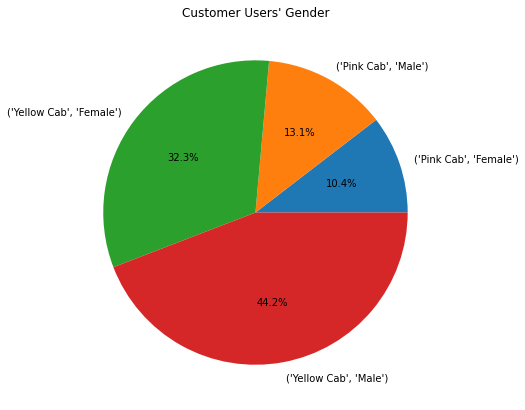

In [74]:
cab_comp_gender = df_copy.groupby(['Company','Gender'])['Users'].count()

# Plot
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(cab_comp_gender.values, labels = cab_comp_gender.index, autopct='%1.1f%%')
fig.set_facecolor('white')
plt.title('Customer Users\' Gender')
plt.show()

In [75]:
cab_comp_gender

Company     Gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
Name: Users, dtype: int64

Observations:

1. Male users prefer to travel in Cab
2. Users prefer to travel in Yellow Cab

#### Users' Age Group and Gender

In [76]:
df_copy.pivot_table(index="Company", columns=['Gender', 'Age Group'], aggfunc = 'size')

Gender     Female                     Male                  
Age Group   Young Middle-aged   Old  Young Middle-aged   Old
Company                                                     
Pink Cab    15929       19442  2109  19624       25130  2477
Yellow Cab  48874       60900  6226  65605       84977  8099

#### Profit based on Users' Age Group

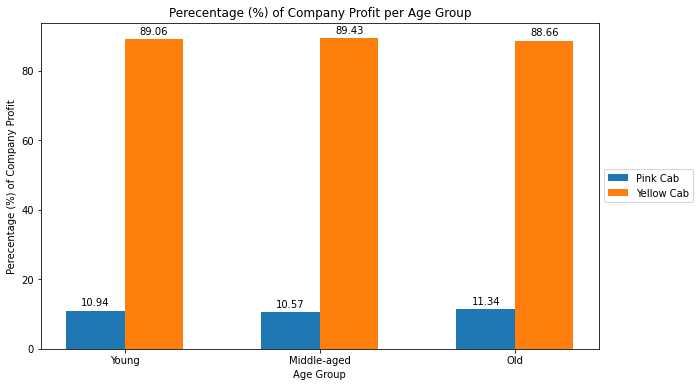

In [83]:
profit_comp_age = df_copy.groupby(['Company', 'Age Group'])['Profit'].sum()
profit_percentage = profit_comp_age.groupby(level = 1).apply(lambda x: round_up_percentage(x))

x = np.arange(len(df_copy['Age Group'].unique()))
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, profit_percentage.loc['Pink Cab'], width, label='Pink Cab')
rects2 = ax.bar(x + width/2, profit_percentage.loc['Yellow Cab'], width, label='Yellow Cab')

ax.set_ylabel('Perecentage (%) of Company Profit')
ax.set_xlabel('Age Group')
ax.set_title('Perecentage (%) of Company Profit per Age Group')
ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_xticks(x, pd.DataFrame(profit_percentage).reset_index('Age Group')['Age Group'].unique())
ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)
plt.show()

#### Profit based on Users' Gender

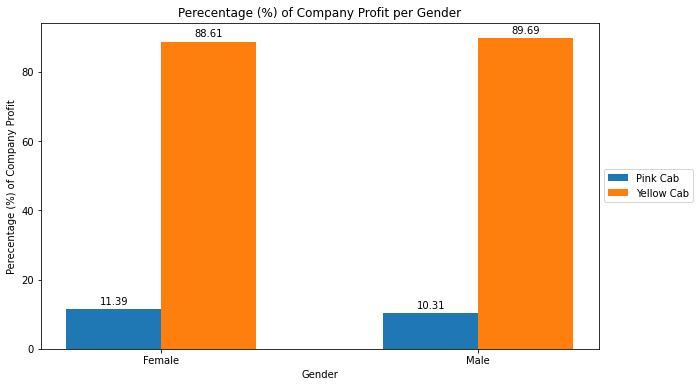

In [84]:
profit_comp_gender = df_copy.groupby(['Company', 'Gender'])['Profit'].sum()
profit_percentage = profit_comp_gender.groupby(level = 1).apply(lambda x: round_up_percentage(x))

x = np.arange(len(df_copy['Gender'].unique()))
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, profit_percentage.loc['Pink Cab'], width, label='Pink Cab')
rects2 = ax.bar(x + width/2, profit_percentage.loc['Yellow Cab'], width, label='Yellow Cab')

ax.set_ylabel('Perecentage (%) of Company Profit')
ax.set_xlabel('Gender')
ax.set_title('Perecentage (%) of Company Profit per Gender')
ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_xticks(x, pd.DataFrame(profit_percentage).reset_index('Gender')['Gender'].unique())
ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)
plt.show()

# 5. Recommendations

We have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:

Customer Reach : Yellow cab covers more than 50% of profit over all 19 cities, but Pink Cab takes 40% to 45% of the profit in SACRAMENTO, NASHVILLE, TUCSON and SAN DIEGO for customers from all age range.

Customer Retention: More users choose Yellow Cab over Pink Cab from 2016 to 2018.

Age wise Reach: Yellow cab has customer in all age group, and it is more popular among Middle-aged users (30 - 60 years old), followed by Young (<30 years old) and Old (> 60 years old).

Gender wise Reach: Male users prefer to travel in Cab over Female.

Features  | Pink Cab  | Yellow Cab
--------- | --------- | --------- 
Profit per KM  | USD 2.77  | USD 7.11
Profit per day  | USD 4982.41 | USD 41333.68

Average Profit per KM: Average profit per KM of Yellow Cab is almost three times the average profit per KM of the Pink cab.

Average Profit per day: Average profit per day of Yellow Cab is almost ten times the average profit per day of the Pink cab.

On the basis of above point , we will recommend Yellow cab for investment.

Conclusion: Invest in Yellow Cab